<a href="https://colab.research.google.com/github/BraulioHermanson/Covid-Brasil/blob/main/Project_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 
from IPython.core.pylabtools import figsize

sns.set_style('white')
%matplotlib inline

In [2]:
# carregando o dataframe
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
#visualizando as 5 primeiras entradas
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Avaliando as colunas e entendendo no site do arquivo o que cada coluna possui.
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
# Filtrando Linhas do Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()


In [6]:
# Salvando em um arquivo csv e adicionando esse arquivo na minha pasta de trabalho
# para não sofrer modificações devido as atualizaçoes do arquivo original
df_brasil.to_csv('covid_26_09_21.csv')

In [7]:
# Importando o arquivo e transformando a coluna date em index
data = 'https://raw.githubusercontent.com/BraulioHermanson/P_datasets/main/covid_26_09_21_1.csv'
df_brasil_cov = pd.read_csv(data,index_col='date',parse_dates=True)


# **ETL**

In [8]:
df_brasil_cov.head()

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-26,15660,BRA,South America,Brazil,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-27,15661,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-28,15662,BRA,South America,Brazil,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2020-02-29,15663,BRA,South America,Brazil,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
2020-03-01,15664,BRA,South America,Brazil,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [9]:
df_brasil_cov.tail()

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-07,16249,BRA,South America,Brazil,21532558.0,15591.0,15069.286,599810.0,451.0,437.286,100622.514,72.857,70.419,2802.936,2.108,2.043,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245109870.0,153360099.0,96366335.0,NaN,1520636.0,1097729.0,114.54,71.67,45.03,NaN,5130.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2021-10-08,16250,BRA,South America,Brazil,21550730.0,18172.0,15011.286,600425.0,615.0,452.857,100707.432,84.918,70.148,2805.810,2.874,2.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246835990.0,153856720.0,97624430.0,NaN,1726120.0,1144332.0,115.35,71.90,45.62,NaN,5348.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2021-10-09,16251,BRA,South America,Brazil,21567181.0,16451.0,15437.714,600829.0,404.0,443.714,100784.309,76.876,72.141,2807.698,1.888,2.073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248201579.0,154202574.0,98653914.0,NaN,1365589.0,1139430.0,115.99,72.06,46.10,NaN,5325.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2021-10-10,16252,BRA,South America,Brazil,21575820.0,8639.0,15385.571,601011.0,182.0,437.571,100824.679,40.370,71.897,2808.549,0.850,2.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249340259.0,154414034.0,99584719.0,NaN,1138680.0,1102112.0,116.52,72.16,46.54,NaN,5150.0,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2021-10-11,16253,BRA,South America,Brazil,21582738.0,6918.0,14884.571,601213.0,202.0,437.286,100857.007,32.328,69.556,2809.493,0.944,2.043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [10]:
# Removendo algumas colunas iniciais que não são interessantes no primeiro momento.
df_brasil_cov.drop(columns=['Unnamed: 0','iso_code','continent','location'],inplace=True)

In [11]:
# Analisando as informações de cada Coluna
df_brasil_cov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 594 entries, 2020-02-26 to 2021-10-11
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   total_cases                              594 non-null    float64
 1   new_cases                                593 non-null    float64
 2   new_cases_smoothed                       589 non-null    float64
 3   total_deaths                             574 non-null    float64
 4   new_deaths                               574 non-null    float64
 5   new_deaths_smoothed                      589 non-null    float64
 6   total_cases_per_million                  594 non-null    float64
 7   new_cases_per_million                    593 non-null    float64
 8   new_cases_smoothed_per_million           589 non-null    float64
 9   total_deaths_per_million                 574 non-null    float64
 10  new_deaths_per_million         

In [12]:
# Avaliando a quantidade de coluans vazias
df_brasil_cov.isnull().sum()

total_cases                                  0
new_cases                                    1
new_cases_smoothed                           5
total_deaths                                20
new_deaths                                  20
                                          ... 
human_development_index                      0
excess_mortality_cumulative_absolute       575
excess_mortality_cumulative                575
excess_mortality                           575
excess_mortality_cumulative_per_million    575
Length: 61, dtype: int64

In [13]:
# Removendo as colunas vazias
df_brasil_cov.dropna(axis=1,how='all',inplace=True)

In [14]:
df_brasil_cov.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'total_tests',
       'total_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_sm

In [15]:
# Removendo as colunas que nâo irão ser analisadas neste documento
df_brasil_cov.drop(['new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million','total_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand','new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index','aged_65_older',
       'aged_70_older','cardiovasc_death_rate', 'diabetes_prevalence','human_development_index', 'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative', 'excess_mortality', 'female_smokers', 'male_smokers','life_expectancy',
       'excess_mortality_cumulative_per_million','population','population_density',
       'median_age','gdp_per_capita','extreme_poverty','hospital_beds_per_thousand'],axis=1,inplace=True)

# Analises dos dados

### *Dicionário de Variaveis*

* `total_cases` - Total confirmed cases of COVID-19
* `new_cases` - New confirmed cases of COVID-19
* `new_cases_smoothed` - New confirmed cases of COVID-19 (7-day smoothed)
* `total_deaths` - Total deaths attributed to COVID-19
* `new_deaths` - New deaths attributed to COVID-19
* `reproduction_rate` - Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database
* `total_tests` - Total tests for COVID-19
* `tests_units` - Units used by the location to report its testing data
* `total_vaccinations` - Total number of COVID-19 vaccination doses administered
* `people_vaccinated` - Total number of people who received at least one vaccine dose
* `people_fully_vaccinated` - Total number of people who received all doses prescribed by the vaccination protocol
* `new_vaccinations` - New COVID-19 vaccination doses administered (only calculated for consecutive days)


In [16]:
# Avaliando a quantidade de valores ausentes no df
df_brasil_cov.isnull().sum()

total_cases                  0
new_cases                    1
total_deaths                20
new_deaths                  20
reproduction_rate           21
total_tests                577
tests_units                496
total_vaccinations         369
people_vaccinated          371
people_fully_vaccinated    392
new_vaccinations           398
dtype: int64

In [17]:
# Avaliando o formato
print('Dimensão do dataset',
  '\nVariaveis: ',df_brasil_cov.shape[1], '\n'
  'Linhas: ',df_brasil_cov.shape[0])


Dimensão do dataset 
Variaveis:  11 
Linhas:  594


In [18]:
df_brasil_cov.head()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
date,,,,,,,,,,,
2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_brasil_cov.tail()

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
date,,,,,,,,,,,
2021-10-07,21532558.0,15591.0,599810.0,451.0,0.94,NaN,NaN,245109870.0,153360099.0,96366335.0,1520636.0
2021-10-08,21550730.0,18172.0,600425.0,615.0,NaN,NaN,NaN,246835990.0,153856720.0,97624430.0,1726120.0
2021-10-09,21567181.0,16451.0,600829.0,404.0,NaN,NaN,NaN,248201579.0,154202574.0,98653914.0,1365589.0
2021-10-10,21575820.0,8639.0,601011.0,182.0,NaN,NaN,NaN,249340259.0,154414034.0,99584719.0,1138680.0
2021-10-11,21582738.0,6918.0,601213.0,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


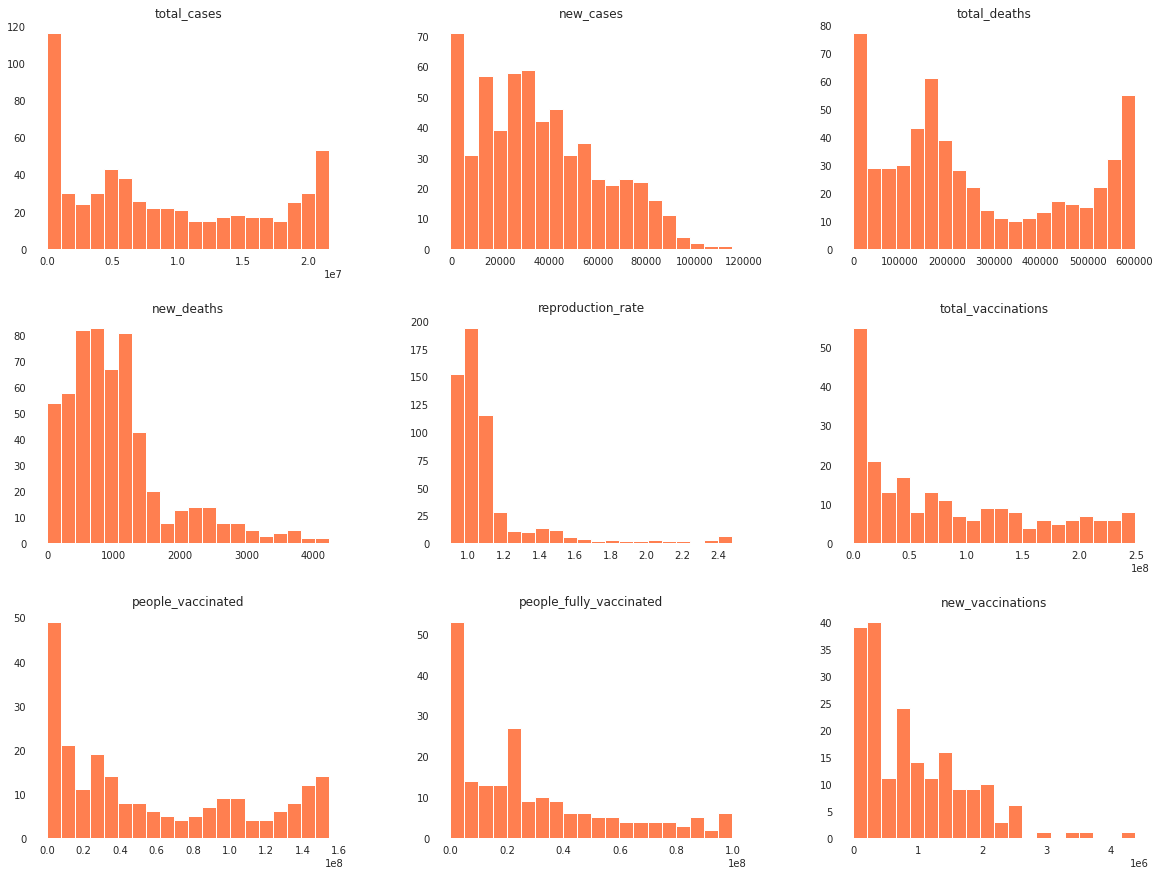

In [20]:
# Avaliando a distribuição dos valores das colunas selecionadas.
df_brasil_cov[['total_cases','new_cases','total_deaths',
              'new_deaths','reproduction_rate','total_vaccinations',
              'people_vaccinated','people_fully_vaccinated','new_vaccinations']].hist(figsize=(20,15), bins=20, color = "Coral", grid=False,)

sns.despine(left=True, bottom=True)

plt.show()

# Analisando as colunas que interessam

In [21]:
# Avaliando os valores descritivos das colunas
(df_brasil_cov[['total_cases','new_cases','total_deaths',
              'new_deaths','reproduction_rate','total_vaccinations',
              'people_vaccinated','people_fully_vaccinated','new_vaccinations']].describe()).round(2)

,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
count,594.00,593.00,574.00,574.00,573.00,2.250000e+02,2.230000e+02,202.00,196.00
mean,8947628.82,36142.72,256010.13,1047.41,1.11,8.205006e+07,5.720197e+07,28576153.04,911461.34
std,7298006.40,25202.66,197046.03,800.31,0.28,7.636466e+07,5.165167e+07,27272521.92,791617.91
min,1.00,-573.00,1.00,0.00,0.90,0.000000e+00,0.000000e+00,1962.00,112.00
25%,2301447.75,15827.00,99798.25,513.25,0.97,1.301333e+07,9.580357e+06,4584227.00,280254.50
50%,7188066.50,32443.00,192125.50,874.00,1.02,5.509891e+07,3.684429e+07,22362745.50,744439.00
75%,15617065.75,53139.00,445755.25,1283.75,1.10,1.365097e+08,1.009527e+08,41509033.25,1372265.75
max,21582738.00,115228.00,601213.00,4249.00,2.48,2.493403e+08,1.544140e+08,99584719.00,4371504.00


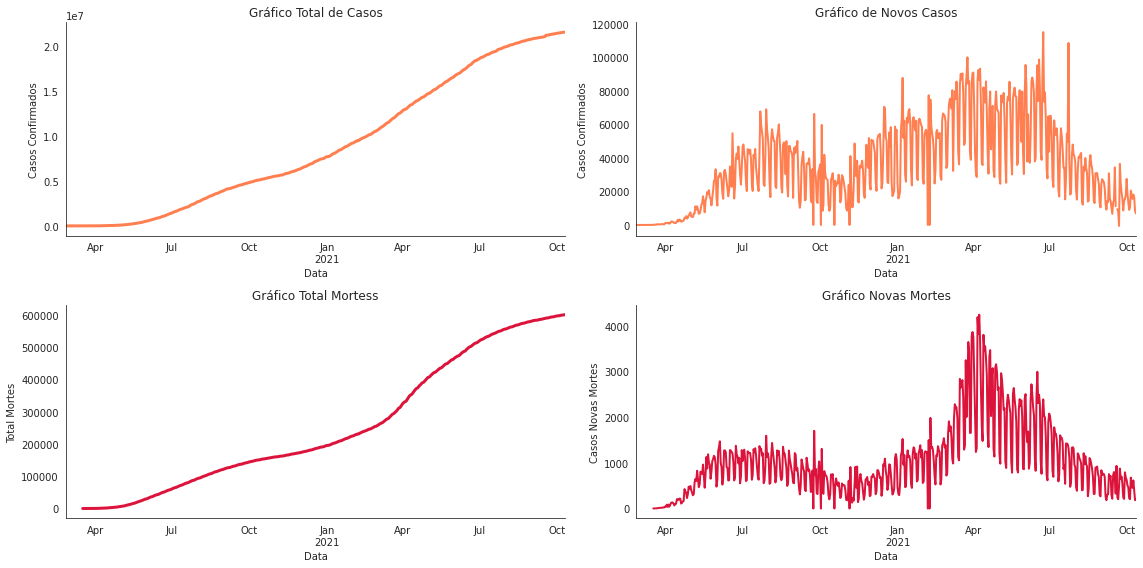

In [22]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16,8),dpi=72)

# plotar total_cases
df_brasil_cov.loc['2020-02-06':'2021-10-11',"total_cases"].plot(kind="line",color= 'Coral', ax=ax1,lw='3')
ax1.set_title("Gráfico Total de Casos")
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Data")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# plotar new_cases
df_brasil_cov.loc['2020-02-06':'2021-10-11',"new_cases"].plot(kind="line",color= 'Coral', ax=ax2,lw='2')
ax2.set_title("Gráfico de Novos Casos")
ax2.set_ylabel("Casos Confirmados")
ax2.set_xlabel("Data")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


# plotar total_deaths
df_brasil_cov.loc['2020-02-06':'2021-10-11',"total_deaths"].plot(kind="line",color='Crimson', ax=ax3,lw='3')
ax3.set_title("Gráfico Total Mortess")
ax3.set_ylabel("Total Mortes")
ax3.set_xlabel("Data")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


# plotar new_deaths
df_brasil_cov.loc['2020-02-06':'2021-10-11',"new_deaths"].plot(kind="line", color='Crimson',ax=ax4,lw=2)
ax4.set_title("Gráfico Novas Mortes")
ax4.set_ylabel("Casos Novas Mortes")
ax4.set_xlabel("Data")
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)


plt.tight_layout()

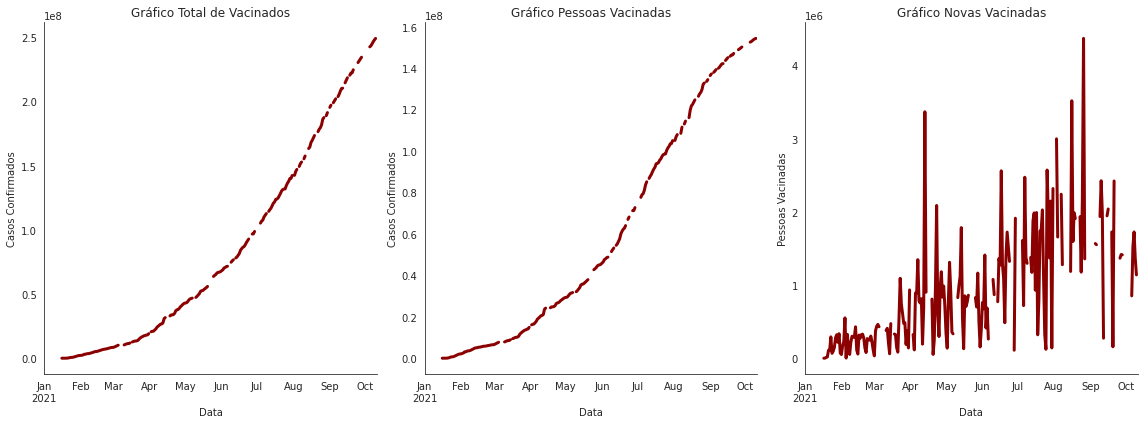

In [23]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,6),dpi=72)

# plotar total_vaccinations
df_brasil_cov.loc['2021-01-01':'2021-10-11',"total_vaccinations"].plot(kind="line",color= 'DarkRed', ax=ax1,lw='3')
ax1.set_title("Gráfico Total de Vacinados")
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Data")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# plotar people_vaccinated
df_brasil_cov.loc['2021-01-01':'2021-10-11',"people_vaccinated"].plot(kind="line",color= 'DarkRed', ax=ax2,lw='3')
ax2.set_title("Gráfico Pessoas Vacinadas")
ax2.set_ylabel("Casos Confirmados")
ax2.set_xlabel("Data")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# plotar new_vaccinations
df_brasil_cov.loc['2021-01-01':'2021-10-11',"new_vaccinations"].plot(kind="line",color='DarkRed', ax=ax3,lw='3')
ax3.set_title("Gráfico Novas Vacinadas")
ax3.set_ylabel("Pessoas Vacinadas")
ax3.set_xlabel("Data")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.tight_layout()

In [24]:
# Data que se tomou a primeira vacina
df_brasil_vacina = df_brasil_cov.loc['2021-01-01':'2021-01-31',"people_vaccinated"]
df_brasil_vacina

date
2021-01-01          NaN
2021-01-02          NaN
2021-01-03          NaN
2021-01-04          NaN
2021-01-05          NaN
2021-01-06          NaN
2021-01-07          NaN
2021-01-08          NaN
2021-01-09          NaN
2021-01-10          NaN
2021-01-11          NaN
2021-01-12          NaN
2021-01-13          NaN
2021-01-14          NaN
2021-01-15          NaN
2021-01-16          0.0
2021-01-17        112.0
2021-01-18       1109.0
2021-01-19      11470.0
2021-01-20      28543.0
2021-01-21     136519.0
2021-01-22     245877.0
2021-01-23     537774.0
2021-01-24     604722.0
2021-01-25     700608.0
2021-01-26     848883.0
2021-01-27    1129885.0
2021-01-28    1450900.0
2021-01-29    1656851.0
2021-01-30    1923813.0
2021-01-31    2046523.0
Name: people_vaccinated, dtype: float64

In [25]:
# Avaliando o total de pessoas vacinadas até 11 de outubro de 2021
df_brasil_cov['people_vaccinated'].max()

154414034.0

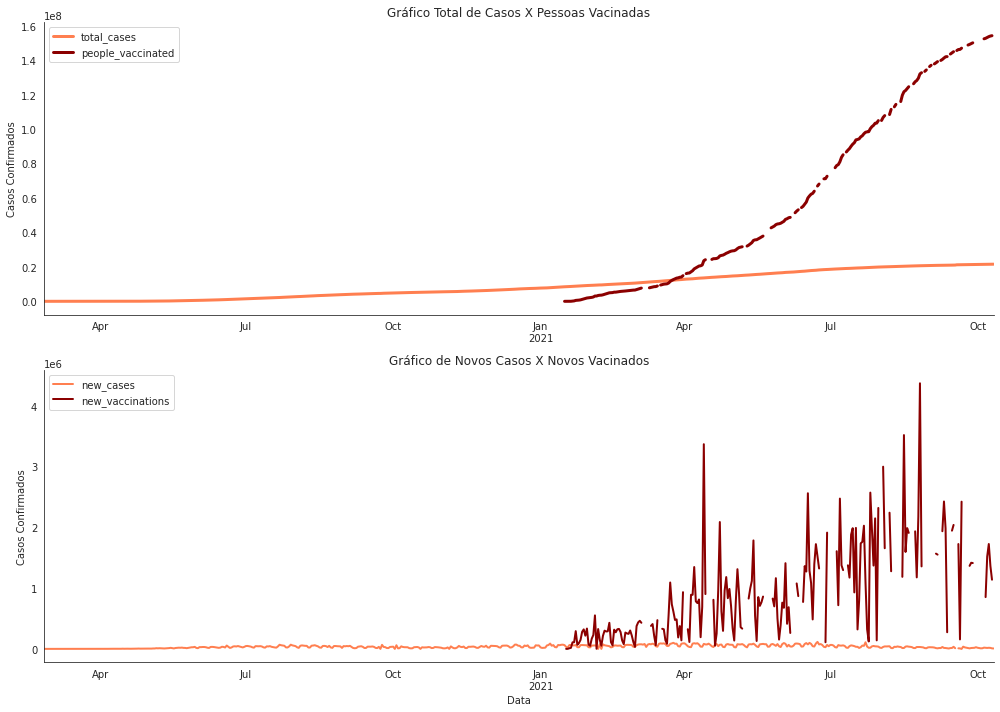

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,10),dpi=72)
# plotar total_cases x people_vaccinated
df_brasil_cov.loc['2020-02-06':'2021-10-11',"total_cases"].plot(kind="line",color= 'Coral', ax=ax1,lw='3')
df_brasil_cov.loc['2020-02-06':'2021-10-11',"people_vaccinated"].plot(kind="line",color= 'DarkRed', ax=ax1,lw='3')
ax1.set_title("Gráfico Total de Casos X Pessoas Vacinadas")
ax1.set_ylabel("Casos Confirmados")
ax1.set_xlabel("Data").set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc='upper left')

 #plotar new_cases x new_vaccinations
df_brasil_cov.loc['2020-02-06':'2021-10-11',"new_cases"].plot(kind="line",color= 'Coral', ax=ax2,lw='2')
df_brasil_cov.loc['2020-02-06':'2021-10-11',"new_vaccinations"].plot(kind="line",color= 'DarkRed', ax=ax2,lw='2')
ax2.set_title("Gráfico de Novos Casos X Novos Vacinados")
ax2.set_ylabel("Casos Confirmados")
ax2.set_xlabel("Data")
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend(loc='upper left')

plt.tight_layout()

In [27]:
# Avaliar correlações
corr = (df_brasil_cov[['total_cases','total_deaths','total_vaccinations',
              'people_vaccinated','people_fully_vaccinated','new_vaccinations']].corr()).round(2)

display(corr)

,total_cases,total_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
total_cases,1.00,1.00,0.93,0.95,0.89,0.70
total_deaths,1.00,1.00,0.92,0.93,0.87,0.70
total_vaccinations,0.93,0.92,1.00,1.00,0.99,0.67
people_vaccinated,0.95,0.93,1.00,1.00,0.97,0.69
people_fully_vaccinated,0.89,0.87,0.99,0.97,1.00,0.57
new_vaccinations,0.70,0.70,0.67,0.69,0.57,1.00


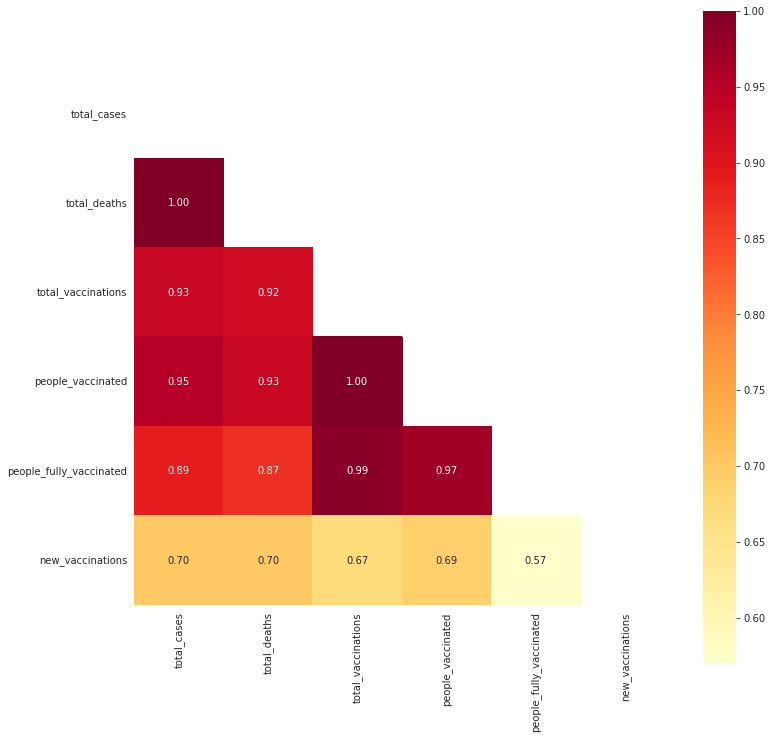

In [28]:
# Heatmap para melhorar a visualização das correlações.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr,mask=mask, cmap='YlOrRd', fmt='.2f',square=True, linecolor='white', annot=True);

# **Conclusão**

* O número total de casos de Covid no Brasil foi gigante `21.582.738`, o que impactou na assitencia dos postos de saude e hospitais gerando a falta leitos para atender os pacientes e tratar. Gerando o número de `601.213` mortes até o periodo `2020-10-11`.
* Foi possivel identificar um número forte para as correlações entre as colunas de números de mortos com total de casos e números de pessoas vacinadas.
* Com o surgimento da vacina em `2021-01-17` tendo `112` pessoas vacinadas de acordo com o dataset, vimos um crescimento exponencial indo até `154.414.034` pessoas vacinadas, superando o número de casos de mortes e ajudando a controlar a propagação da doença.